In [1]:
# get train file names
import glob

train_folders = ['CAR', 'UAH', 'UJITI', 'UJIUB']

files_names = []
n_files = 0
for building in train_folders:
    cur_file_names = glob.glob('train/' + building + '/log*')
    files_names.append(sorted(cur_file_names))
    n_files += len(cur_file_names)

print(files_names)
print('There are %d files' % n_files)

[['train/CAR/logfile_CAR_R1_S3.txt', 'train/CAR/logfile_CAR_R1_S3mini.txt', 'train/CAR/logfile_CAR_R2_S3.txt', 'train/CAR/logfile_CAR_R2_S4.txt'], ['train/UAH/logfile_UAH_R1_S3.txt', 'train/UAH/logfile_UAH_R1_S4.txt', 'train/UAH/logfile_UAH_R2_S3.txt', 'train/UAH/logfile_UAH_R2_S4.txt', 'train/UAH/logfile_UAH_R4_S3.txt', 'train/UAH/logfile_UAH_R4_S4.txt'], ['train/UJITI/logfile_UJITI_R1_NEXUS5.txt', 'train/UJITI/logfile_UJITI_R2_NEXUS5.txt'], ['train/UJIUB/logfile_UJIUB_R1n_S3.txt', 'train/UJIUB/logfile_UJIUB_R1r_S3.txt', 'train/UJIUB/logfile_UJIUB_R2n_S3.txt', 'train/UJIUB/logfile_UJIUB_R2r_S3.txt', 'train/UJIUB/logfile_UJIUB_R3_S3.txt']]
There are 17 files


In [5]:
# import files into dataframes
import numpy as np
import pandas as pd

track= []
for building in files_names:
    track.append([])
    for track_name in building:
        print(track_name)
        track[-1].append(pd.read_csv(track_name, sep=';', engine='c', names=range(11)))
        print(np.unique(track[-1][-1][0]))
print(track[0][0].head())

train/CAR/logfile_CAR_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R1_S3mini.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'MAGN' 'POSI' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/CAR/logfile_CAR_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX'
 'SOUN' 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R1_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R4_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logf

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Find time limits per POSI id
def posi_time_limits(pos_array):
    # create start and end index time array
    pos_array['ind_begin_time'] = np.zeros((pos_array.shape[0]))
    pos_array['ind_end_time'] = np.zeros((pos_array.shape[0]))
    pos_array['ind_end_time'].iat[-1] = 99999

    for i in range(1, pos_array.shape[0]):
        cur_split = (float(pos_array['Time'].iloc[i]) + float(pos_array['Time'].iloc[i-1])) / 2
        pos_array['ind_begin_time'].iat[i] = cur_split       
        pos_array['ind_end_time'].iat[i-1] = cur_split       
    return pos_array

# create true ground dataframes
pos = []
for i in range(len(track)):
    pos.append([])
    for j in range(len(track[i])):
        pos[i].append(track[i][j][[1, 2, 3, 4, 5, 6, 7]].iloc[track[i][j][0].values == 'POSI'])
        pos[i][j] = pos[i][j].dropna(axis=1)
        pos[i][j].columns = ['Time', 'index', 'Lat', 'Lon', 'FloorID', 'BuildingID']
        pos[i][j] = posi_time_limits(pos[i][j])

i = 1
j = 2
print(files_names[i][j])
print(pos[i][j].shape[0])
print(pos[i][j]['FloorID'].values)
print(pos[i][j].head())

train/UAH/logfile_UAH_R2_S3.txt
64
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  2.  1.  0.  0.  0.  0.  0.  0.]
         Time  index          Lat       Lon  FloorID  BuildingID  \
4142    8.618    1.0  40.51278407  -3.34849      0.0        20.0   
16724  34.656    2.0  40.51296307  -3.34844      0.0        20.0   
24993  51.802    3.0  40.51296539  -3.34859      0.0        20.0   
32452  67.263    4.0  40.51302711  -3.34866      0.0        20.0   
39755  82.372    5.0  40.51307726  -3.34879      0.0        20.0   

       ind_begin_time  ind_end_time  
4142           0.0000       21.6370  
16724         21.6370       43.2290  
24993         43.2290       59.5325  
32452         59.5325       74.8175  
39755         74.8175       92.8480  


In [19]:
pressure = []
for i in range(len(track)):
    pressure.append([])
    for j in range(len(track[i])):
        pressure[-1].append(track[i][j][[1, 2, 3, 4]].iloc[track[i][j][0].values == 'PRES'])
        pressure[i][j].columns = ['AppTime', 'SensorTime', 'Pressure','SensorAcc']
        pressure[i][j].index = pressure[i][j]['AppTime']
        pressure[i][j] = pressure[i][j].drop('AppTime', axis=1)
        pressure[i][j] = pressure[i][j].astype(float)
print(pressure[0][1].head())

Empty DataFrame
Columns: [SensorTime, Pressure, SensorAcc]
Index: []


In [33]:
# Smooth signal
def exp_smooth(time_series, sensor_series, alpha):
    # forward in time
    sensor_forward = np.zeros((sensor_series.shape))
    sensor_forward[0] = sensor_series[0]
    for i in range(1, time_series.shape[0]):
        dt = time_series[i] - time_series[i-1]
        sensor_forward[i] = alpha * sensor_series[i] + (1 - alpha) * sensor_forward[i-1]
    # backwards in time
    sensor_backwards = np.zeros((sensor_series.shape))
    sensor_trend = np.zeros((sensor_series.shape))
    sensor_backwards[-1] = sensor_series[-1]
    for i in range(time_series.shape[0]-2, -1, -1):
        dt = time_series[i+1] - time_series[i]
        sensor_backwards[i] = alpha * sensor_series[i] + (1 - alpha) * sensor_backwards[i+1]
    sensor_smoothed = (sensor_forward + sensor_backwards) / 2
    return sensor_smoothed

for i in range(len(pressure)):
    for j in range(len(pressure[i])):
        if pressure[i][j].shape[0]:
            pressure[i][j]['PresSmoothed'] = exp_smooth(pressure[i][j]['SensorTime'].values, 
                                                        pressure[i][j]['Pressure'].values, 0.02)

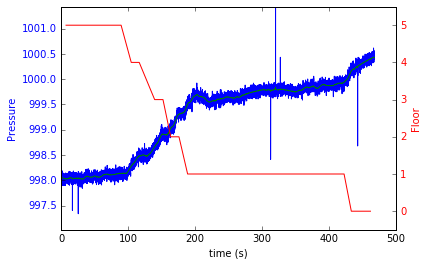

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot pressure and floor over time
i = 3
j = 1

fig, ax1 = plt.subplots()
ax1.plot(pressure[i][j].index.values, pressure[i][j]['Pressure'].values, 'b',
         pressure[i][j].index.values, pressure[i][j]['PresSmoothed'].values, 'g')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Pressure', color='b')
ax1.set_ylim([np.min(pressure[i][j]['PresSmoothed'].values) - 1, np.max(pressure[i][j]['PresSmoothed'].values) + 1])
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(pos[i][j]['Time'].values, pos[i][j]['FloorID'].values, 'r')
ax2.set_ylabel('Floor', color='r')
ax2.set_ylim([-0.5,5.5])
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()